In [84]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from  scipy.integrate import solve_ivp

## What is the value of b

$$
\dot x = sin(y) - bx \\
\dot y = sin(z) - by  \\
\dot z = sin(x) - bz
$$

Fixed point of the form $x=y=z=\alpha$ leads to $sin(\alpha) = b*alpha$


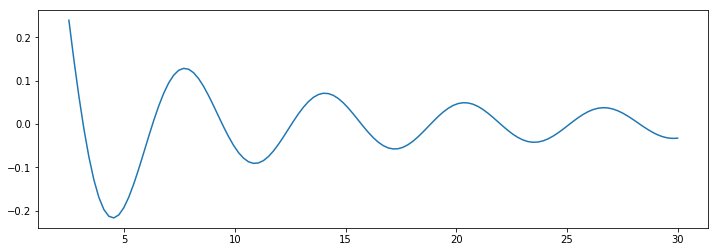

In [77]:
plt.figure(figsize=(12, 4))

alpha = np.linspace(2.5, 30, 123)
plt.plot(alpha, np.sin(alpha)/alpha);

In [125]:
b = .192

@jit(nopython=True)
def thomas_attractor(xyz):
    ''' ODE for Thomas attractor
        xyz: point positions, shape (dim, )
    '''
    
    sin_xyz = np.sin(xyz)
    dYdt = -b*xyz
    dYdt[0] += sin_xyz[1]
    dYdt[1] += sin_xyz[2]
    dYdt[2] += sin_xyz[0]
    return dYdt#/np.sqrt(np.sum(dYdt**2))

_ = thomas_attractor(np.array([1, 2, 3]))

In [126]:
def burn():
    y0 = np.random.randn(3)*3
    t_end = 500
    sol = solve_ivp(lambda t, y: thomas_attractor(y), (0, t_end), y0,
                    method='RK23', vectorized=True,
                    #rtol=1e-4, atol=1e-3,
                    first_step=.5)
    y0 = sol.y[:, -1]
    return y0

    b = .171  3 cycles
    b = .172

    .19   1 cycle

In [127]:
all_y0 = [burn() for _ in range(10)]

In [128]:
method = 'RK23'
t_end = 250
all_sol = []
for y0 in all_y0:
    sol = solve_ivp(lambda t, y: thomas_attractor(y), (0, t_end), y0,
                                method=method, vectorized=True,
                                rtol=1e-6, atol=1e-5,
                                first_step=.1)
    all_sol.append(sol)

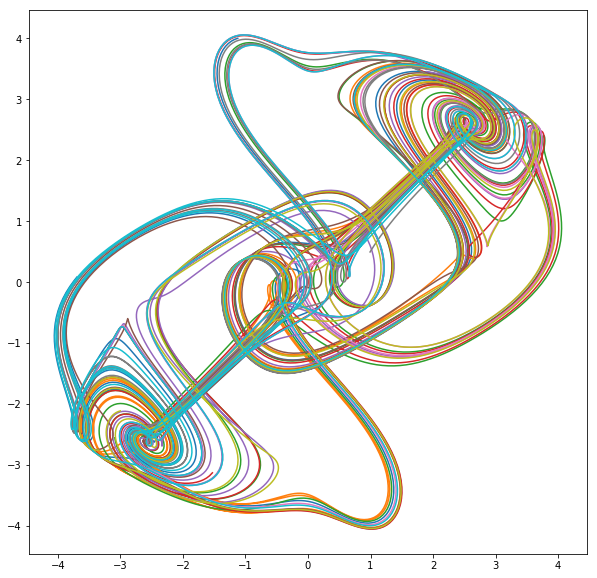

In [129]:
plt.figure(figsize=(10, 10))

for sol in all_sol:
    plt.plot(sol.y[0, :], sol.y[1, :])
    

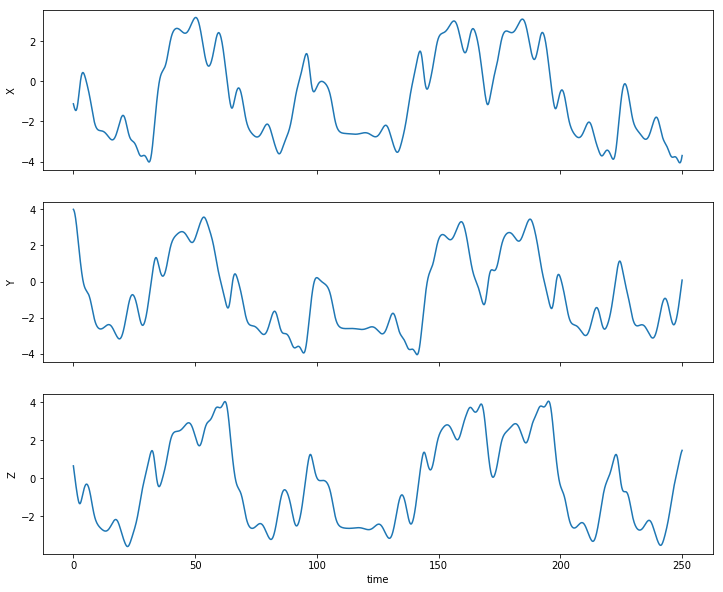

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,
                                    figsize=(12, 10))
name = 'method'
for sol in all_sol:
    ax1.plot(sol.t, sol.y[0, :], '-', label=name);
    ax2.plot(sol.t, sol.y[1, :], '-', label=name);
    ax3.plot(sol.t, sol.y[2, :], '-', label=name);
    ax1.set_ylabel('X');
    ax2.set_ylabel('Y');
    ax3.set_ylabel('Z');
    break
    
#ax1.legend();
ax3.set_xlabel('time');

0.09639190250686702 0.026486570471498022


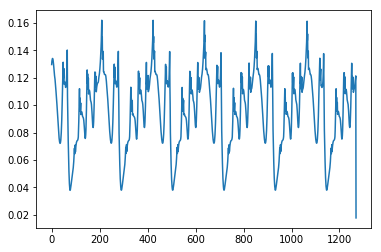

In [120]:
sol = all_sol[-1]
ds = np.sqrt(np.sum(np.diff(sol.y, axis=1)**2, axis=0))
print(ds.mean(), ds.std())

plt.plot(ds);

In [ ]:
0.18190714292419113 0.06781728182480547